# Single layer Perceptron

In [105]:
import kagglehub

path = kagglehub.dataset_download("sagaraiarchitect/placement-of-students")

print("Path to dataset files:", path)

100%|██████████| 687/687 [00:00<00:00, 254kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sagaraiarchitect/placement-of-students/versions/1


In [172]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [173]:
dataset = pd.read_csv('/content/drive/MyDrive/ML & Data Science/Placement_datatset.zip')

In [174]:
dataset.head(4)

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1


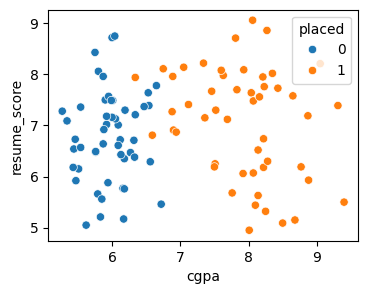

In [175]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='cgpa',y='resume_score', data=dataset,hue='placed')
plt.show()

In [176]:
x=dataset.iloc[:,:-1]
y=dataset["placed"]

In [177]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [178]:
from sklearn.linear_model import Perceptron

In [179]:
pr=Perceptron()
pr.fit(x_train,y_train)

Perceptron()

In [180]:
pr.score(x_test,y_test)*100, pr.score(x_test, y_test)*100

(75.0, 75.0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

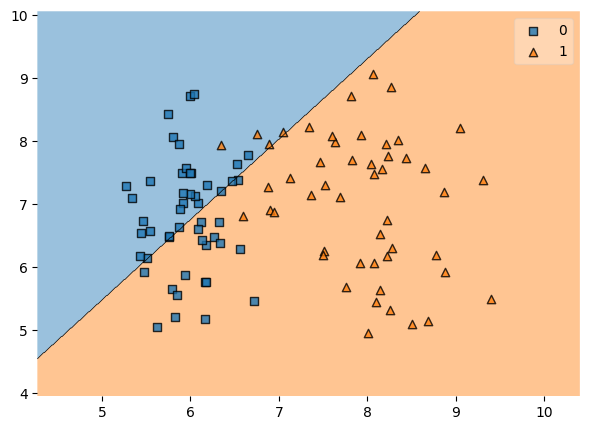

In [181]:
plt.figure(figsize=(7,5))
plot_decision_regions(x.to_numpy(),y.to_numpy(), clf=pr)

# in the result  below it is observed that the single layer percetron does not seperate the class clearly
# sometimes in the non-linearly seperabe data the seperation is not done clearly beacse of which more neurons are added to it to linearly seperate the data

# Customer Churning Prediction

In [107]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
dataset = pd.read_csv("/content/drive/MyDrive/ML & Data Science/Churn_Modelling.csv")
dataset.drop(columns=['Geography', 'Gender'], inplace=True)

In [108]:
from sklearn.model_selection import train_test_split

In [111]:
dataset.head(3)


,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42.0,8,159660.80,3,1,0,113931.57,1


In [113]:
input_data= dataset.iloc[:, :-1]
output_data= dataset.iloc[:, -1]

In [114]:
ss=StandardScaler()
input_data=pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns) # Changed 'fit_transorm' to 'fit_transform'

In [115]:
input_data

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary
0,-0.783213,-0.326221,0.293148,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.022154
1,-0.606534,-0.440036,0.197807,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216783
2,-0.995885,-1.536794,0.293148,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240934
3,0.144767,0.501521,0.007126,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108638
4,0.652659,2.063884,0.388488,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.364973
...,...,...,...,...,...,...,...,...,...
9995,-1.177652,1.246488,0.007126,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066143
9996,-1.682806,-1.391939,-0.374236,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.028255
9997,-1.479282,0.604988,-0.278895,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008281
9998,-0.119356,1.256835,0.293148,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.124950


In [116]:
import tensorflow

In [117]:
from keras.layers import Dense
from keras.models import Sequential

In [118]:
ann= Sequential()


In [119]:
ann.add(Dense(6,input_dim=9,activation='relu'))
ann.add(Dense(4,activation='relu'))
ann.add(Dense(2,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [120]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [121]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

In [122]:
x_train.shape

(8000, 9)

In [123]:
ann.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7886 - loss: nan
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7962 - loss: nan
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8044 - loss: nan
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7933 - loss: nan
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7937 - loss: nan
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7952 - loss: nan
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7944 - loss: nan
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8009 - loss: nan
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7933 - loss: nan
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7926 - loss: nan


In [124]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

dataset = pd.read_csv("/content/drive/MyDrive/ML & Data Science/Churn_Modelling.csv")
dataset.drop(columns=['Geography', 'Gender'], inplace=True)

input_data = dataset.iloc[:, :-1]
output_data = dataset.iloc[:, -1]

# Standardize input data using StandardScaler
ss = StandardScaler()
input_data = pd.DataFrame(ss.fit_transform(input_data), columns=input_data.columns)

# Create the neural network model
ann = Sequential()
ann.add(Dense(6, input_dim=input_data.shape[1], activation='relu'))  # Dynamically set input_dim
ann.add(Dense(4, activation='relu'))
ann.add(Dense(2, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

# Convert data to NumPy arrays before fitting
x_train = x_train.values  # Convert to NumPy array
y_train = y_train.values  # Convert to NumPy array

# Fit the model
ann.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5508 - loss: nan
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: nan
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7923 - loss: nan
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7997 - loss: nan
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7943 - loss: nan
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8042 - loss: nan
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7963 - loss: nan
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7926 - loss: nan
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7998 - loss: nan
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: nan


In [160]:
prd=ann.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [161]:
prd

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [162]:
prd_data=[]
for i in prd:
  if i[0]>0.5:
    prd_data.append(1)
  else:
    prd_data.append(0)

In [128]:
prd_data

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [163]:
from sklearn.metrics import accuracy_score

In [164]:
accuracy_score(y_test, prd_data)*100

80.35

In [165]:
prd1= ann.predict(x_train)

prd_data1=[]
for i in prd1:
  if i[0]>0.5:
    prd_data1.append(1)
  else:
    prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [166]:
ann.fit(x_train, y_train, batch_size=100, epochs=50)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7956 - loss: nan
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7922 - loss: nan
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: nan
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7968 - loss: nan
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: nan
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7969 - loss: nan
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7925 - loss: nan
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7879 - loss: nan
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7936 - loss: nan
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7968 - loss: nan
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7960 - loss: nan
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7991 - loss: nan
Epoch 13/50
80/80 ━━━━━━━

In [168]:
accuracy_score(y_train, prd_data1)*100

79.45

In [134]:
x_test

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary
6252,-0.047942,-0.564197,-0.660257,-0.695982,0.324119,0.807737,-1.547768,-1.030670,-1.013449
4684,0.639799,-0.284834,0.388488,-1.387538,-1.225848,0.807737,0.646092,0.970243,0.805116
1731,0.428032,-0.512463,0.483829,-0.350204,-1.225848,0.807737,0.646092,-1.030670,-0.721811
4742,0.989724,-1.495407,1.913936,1.032908,0.683816,0.807737,0.646092,0.970243,1.227638
4521,-0.584472,-0.936681,-1.136960,0.687130,0.777477,-0.911583,0.646092,0.970243,0.253770
...,...,...,...,...,...,...,...,...,...
6412,-1.278399,-0.502117,1.341893,-0.004426,0.349118,-0.911583,-1.547768,0.970243,-0.956941
8285,-1.644728,-0.429689,-1.327641,1.724464,-1.225848,-0.911583,-1.547768,0.970243,0.170752
7853,0.774801,0.822271,0.769850,0.687130,-1.225848,-0.911583,0.646092,-1.030670,-1.159766
1095,-0.025852,0.429093,-0.946279,-0.350204,-1.225848,-0.911583,0.646092,-1.030670,-0.405453


In [135]:
import numpy as np  # Import NumPy

prd = ann.predict(np.array([[-0.047942, -0.564197, -0.660257, -0.695982, 0.324119, 0.807737, -1.547768, -1.030670, -1.013449]]))
prd_data = []
for i in prd:
  if i[0] > 0.5:
    prd_data.append(1)
  else:
    prd_data.append(0)
prd_dataprd_data= []
for i in prd:
  if i[0]>0.5:
    prd_data.append(1)
  else:
    prd_data.append(0)
prd_data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[0, 0]

In [136]:
y_test

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0
...,...
6412,1
8285,0
7853,1
1095,1


In [138]:
accuracy_score(y_test, prd_data)*100

ValueError: Found input variables with inconsistent numbers of samples: [2000, 2]

In [139]:
accuracy_score(y_train, prd_data1)*100

79.45

In [140]:
ann.fit(x_train, y_train, batch_size=200, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7964 - loss: nan - val_accuracy: 0.8035 - val_loss: nan
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: nan - val_accuracy: 0.8035 - val_loss: nan
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7879 - loss: nan - val_accuracy: 0.8035 - val_loss: nan
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7970 - loss: nan - val_accuracy: 0.8035 - val_loss: nan
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7965 - loss: nan - val_accuracy: 0.8035 - val_loss: nan
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7895 - loss: nan - val_accuracy: 0.8035 - val_loss: nan
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7907 - loss: nan - val_accuracy: 0.8035 - val_loss: nan
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7893 - loss: nan - val_accuracy: 0.8035 - val_loss: nan
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s

In [141]:
train_accuracy= ann.history.history["accuracy"]
test_accuracy= ann.history.history["val_accuracy"]

In [142]:
len(test_accuracy)

50

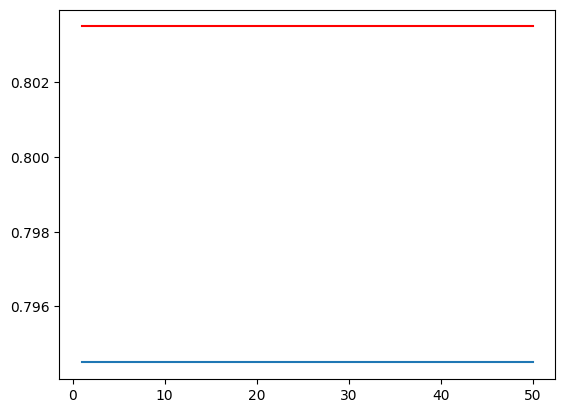

In [143]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(1,51)], train_accuracy)
plt.plot([i for i in range(1,51)], test_accuracy,c="red")

In [144]:
from keras.callbacks import EarlyStopping

In [145]:
# EarlyStopping

ann.fit(x_train, y_train, batch_size=200, epochs=50, validation_data=(x_test, y_test), callbacks=EarlyStopping())

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7941 - loss: nan - val_accuracy: 0.8035 - val_loss: nan
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7989 - loss: nan - val_accuracy: 0.8035 - val_loss: nan


In [146]:
# Regularisation - used to prevent overfitting

from keras.regularizers import l2


In [147]:
ann.add(Dense(6, input_dim=input_data.shape[1], activation='relu', kernel_regularizer=l2(0.01)))  # Apply L2 regularization to the kernel
ann.add(Dense(4, activation='relu'))
ann.add(Dense(2, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [148]:
# EarlyStopping

ann.fit(x_train, y_train, batch_size=200, epochs=50, validation_data=(x_test, y_test), callbacks=EarlyStopping())

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7948 - loss: nan - val_accuracy: 0.8035 - val_loss: nan
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7990 - loss: nan - val_accuracy: 0.8035 - val_loss: nan


In [150]:
# hyperparameter tuning

from keras.layers import Dense, BatchNormalization



In [154]:
ann.add(Dense(6, input_dim=9, activation='relu', kernel_regularizer=l2(0.01)))
ann.add(BatchNormalization())
ann.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
ann.add(BatchNormalization())
ann.add(Dense(2, activation='relu',kernel_regularizer=l2(0.01)))
ann.add(BatchNormalization())
ann.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [155]:
# EarlyStopping

ann.fit(x_train, y_train, batch_size=200, epochs=40, validation_data=(x_test, y_test), callbacks=EarlyStopping())

Epoch 1/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7930 - loss: nan - val_accuracy: 0.8035 - val_loss: nan
Epoch 2/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7975 - loss: nan - val_accuracy: 0.8035 - val_loss: nan


In [156]:
from keras.layers import Dropout

In [169]:
ann.add(Dense(6, input_dim=9, activation='relu', kernel_regularizer=l2(0.01)))
ann.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
ann.add(Dropout(0.5))
ann.add(Dense(2, activation='relu', kernel_regularizer=l2(0.01)))
ann.add(Dropout(0.3))
ann.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [170]:
# EarlyStopping

ann.fit(x_train, y_train, batch_size=200, epochs=40, validation_data=(x_test, y_test), callbacks=EarlyStopping())

Epoch 1/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7933 - loss: nan - val_accuracy: 0.8035 - val_loss: nan
Epoch 2/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7955 - loss: nan - val_accuracy: 0.8035 - val_loss: nan
